In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import ipywidgets as widgets
import sys
import matplotlib.colors as colors
sys.path.append("/Users/ash/utilities")
import utilities as ut

In [134]:
potential = "att"
rcon = 7.051282051282051
width = 0.2564102564102564
v = 0.6
phi = 1.2
f = 150.0
al = 0.0
al_r = 0.0
eps = 5.0
rc = 1.05
kap = 0.0
indir = "./out/wca"
fname = "{}/v{}phi{}f{}al{}alr{}kap{}.pickle".format(indir,v,phi,f,al,al_r,kap)
if potential=="att":
    indir = "./out/att"
    fname = "{}/v{}phi{}f{}al{}alr{}weps{}rc{}kap{}.pickle".format(indir,v,phi,f,al,al_r,eps,rc,kap)
with open(fname,'rb') as handle:
    data = pickle.load(handle)
r = data['r']
phi = data['phi']
def animate(t,r,phi):
    x = r[t,:,0]
    y = r[t,:,1]
    cNorm = colors.Normalize(vmin=-np.pi,vmax=np.pi)
    ut.circles(x,y,0.5,c=range(len(x)),cmap='jet')
    ut.circles(0,0,rcon,'k',fc='None')
    ut.circles(0,0,rcon+width,'k',fc='None')
    plt.gca().set_aspect(1)
widgets.interact(animate, t=(0,len(r)-1,1), r=widgets.fixed(r), phi=widgets.fixed(phi))

FileNotFoundError: [Errno 2] No such file or directory: './out/att/v0.6phi1.2f150.0al0.0alr0.0weps5.0rc1.05kap0.0.pickle'

In [41]:
rcon = 7.051282051282051
width = 0.2564102564102564
v = 0.6
phi = 1.2
f = 300.0
al = 0.0
indir = "./out"
fname = "{}/v{}phi{}f{}al{}".format(indir,v,phi,f,al)
def animate(t,fname):
    x,y,phi = np.loadtxt("{}_{}.dat".format(fname,t),unpack=1)
    ut.circles(x,y,0.5,'r')
    ut.circles(0,0,rcon,'k',fc='None')
    ut.circles(0,0,rcon+width,'k',fc='None')
    plt.gca().set_aspect(1)
widgets.interact(animate, t=(0,len(r)-1,1), fname=widgets.fixed(fname))

interactive(children=(IntSlider(value=99, description='t', max=199), Output()), _dom_classes=('widget-interact…

<function __main__.animate(t, fname)>

## Angle-resolved density

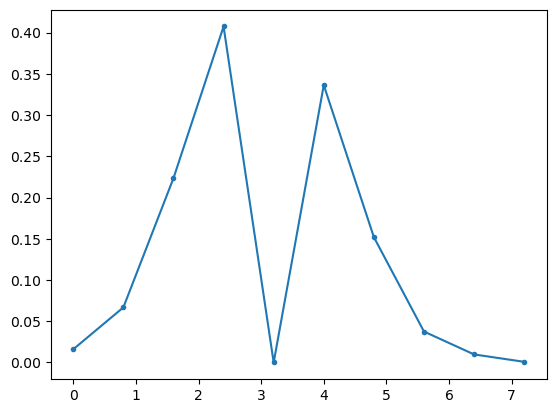

In [111]:
potential = "wca"
rcon = 7.051282051282051
width = 0.2564102564102564
v = 0.1
phi = 1.2
f = 150.0
al = 0.0
al_r = 0.0
eps = 3.0
rc = 1.05
kap = 50.0
indir = "./out/wca"
fname = "{}/v{}phi{}f{}al{}alr{}kap{}.pickle".format(indir,v,phi,f,al,al_r,kap)
if potential=="att":
    indir = "./out/att"
    fname = "{}/v{}phi{}f{}al{}alr{}weps{}rc{}.pickle".format(indir,v,phi,f,al,al_r,eps,rc)
with open(fname,'rb') as handle:
    data = pickle.load(handle)
r = data['r']
phi = data['phi']
npart = []
bin_size = np.pi/8
for t in range(len(r)):
    x = r[t,:,0]
    y = r[t,:,1]
    theta = np.arctan2(y,x)
    
    bins = np.arange(-np.pi,np.pi+bin_size,bin_size)
    _npart, _ = np.histogram(theta,bins=bins)
    npart.extend(_npart)
hist, bin_edges = np.histogram(npart,bins=10,density=1)
plt.plot(bin_edges[:-1],hist,'.-')
# x = r[:,:,0].flatten()
# y = r[:,:,1].flatten()
# theta = np.arctan2(y,x)
# bins = np.arange(-np.pi,np.pi+np.pi/8,np.pi/8)
# hist, bin_edges = np.histogram(theta,bins=bins)
# bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
# plt.plot(bin_centers,hist,'.-')

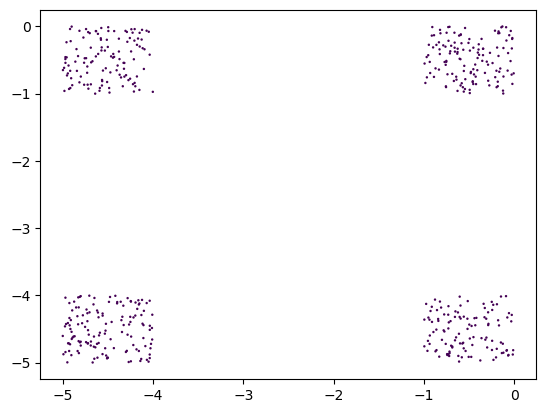

In [147]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist,squareform
 
# box size
L=5.
threshold=0.3
# create data
r=np.random.uniform(-1,1, size=(500,2))
# create for corners
r[r>0]-=L

def clustering_pbc(r,L):
    total = 0
    for d in range(r.shape[1]):
        dist = pdist(r[:,d].reshape(r.shape[0],1))
        # PBC
        dist[dist>(0.5*L)] -= L
        total += dist**2
    total = np.sqrt(total)
    db = DBSCAN(eps=threshold, metric='precomputed').fit(squareform(total))
    return db
db = clustering_pbc(r,L)
plt.scatter(r[:,0], r[:,1],c=db.labels_,s=3, edgecolors='None')